In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 7)

import scipy
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("F:/datascientist/DATA/Flight price dataset.csv")

In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
df.shape

(300153, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# No null values in dataset

In [7]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [8]:
df = df.drop("Unnamed: 0", axis=1)

In [9]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [10]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [11]:
columns = ['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price']

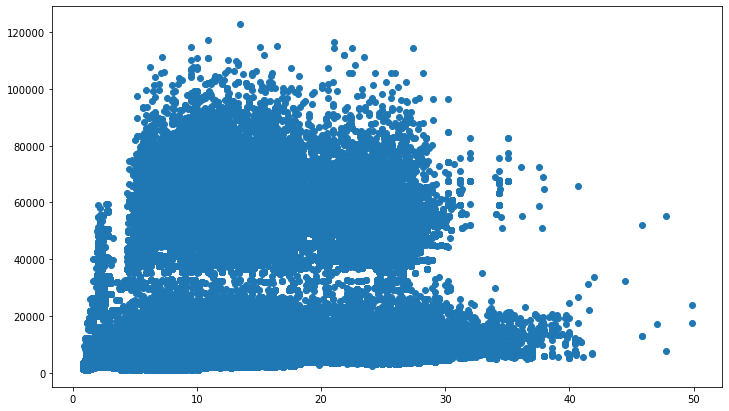

In [12]:
plt.scatter(df.duration,df.price)

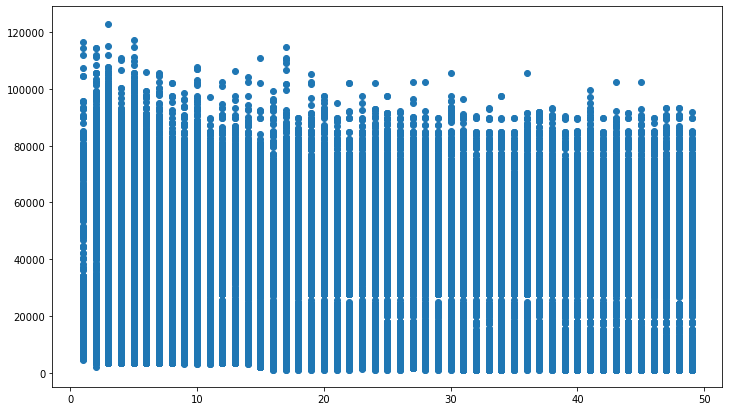

In [13]:
plt.scatter(df.days_left,df.price)

# Correlation Graph : Checking Multicolinearity

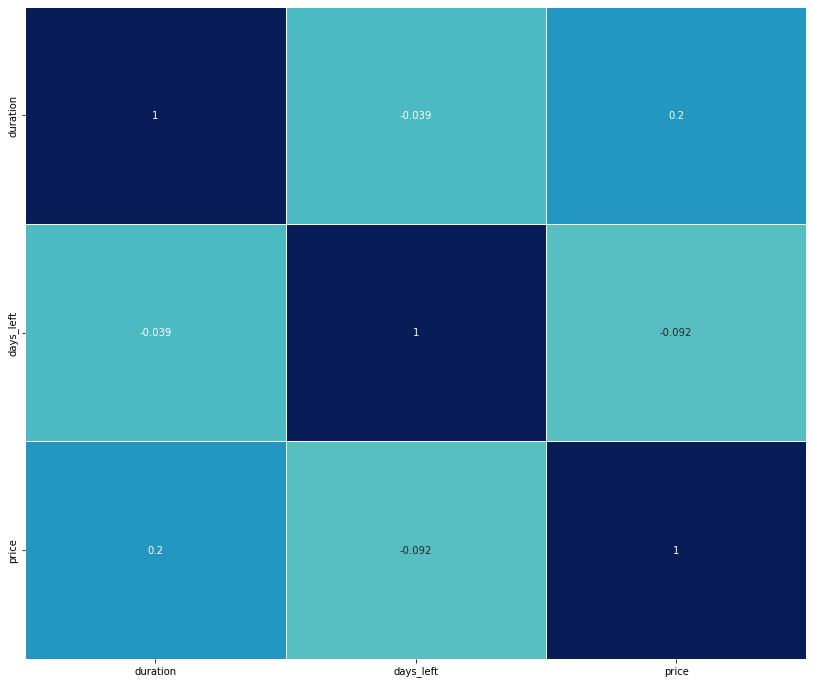

In [14]:
plt.figure(figsize = (14, 12))
sns.heatmap(df.corr(), annot = True, linewidth = .5, center = 0, cbar = False, cmap = 'YlGnBu')
plt.show()

# Checking for outliers 

<AxesSubplot:xlabel='duration'>

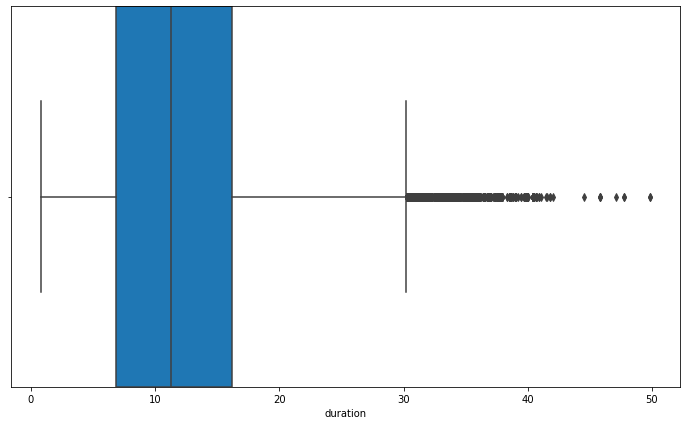

In [15]:
import seaborn as sns
sns.boxplot(df.duration,saturation=4,
    width=1)

In [16]:
# Using IQ method to eliminate the outliers

In [17]:
IQR = df.duration.quantile(0.75)-df.duration.quantile(0.25)
upper_limit = df.duration.quantile(0.75) + (1.5*IQR)
lower_limit = df.duration.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

30.180000000000003 -7.1800000000000015


In [18]:
df["duration"] = np.where(df["duration"] > upper_limit,upper_limit,df["duration"])
df["duration"]  = np.where(df["duration"] < lower_limit,lower_limit,df["duration"])

<AxesSubplot:xlabel='duration'>

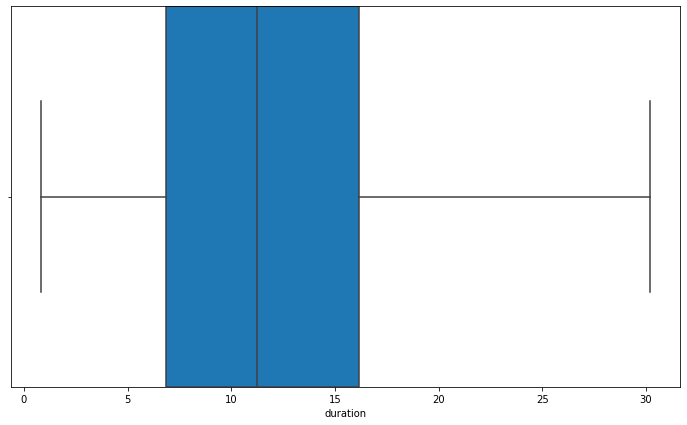

In [19]:
import seaborn as sns
sns.boxplot(df.duration,saturation=4,
    width=1)

<AxesSubplot:xlabel='days_left'>

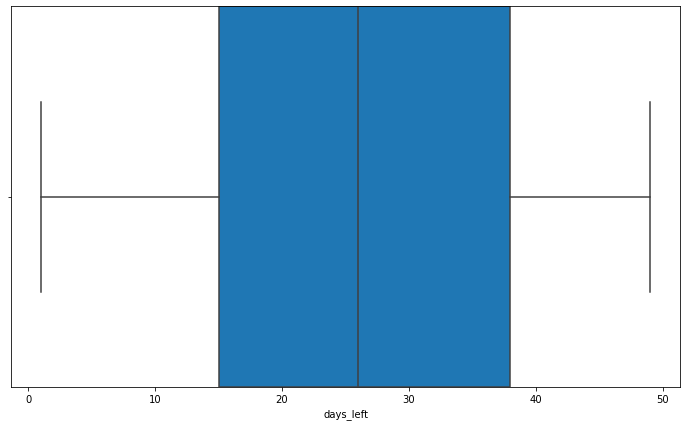

In [20]:
import seaborn as sns
sns.boxplot(df.days_left,saturation=4,
    width=1)

In [21]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [22]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              357
days_left              49
price               12157
dtype: int64

In [23]:
df.groupby("airline")["price"].agg("mean")

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

In [24]:
df.groupby("class")["airline"].agg("count")

class
Business     93487
Economy     206666
Name: airline, dtype: int64

# Checking for P values

In [25]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
import scipy

In [26]:
base = ols("price  ~ airline ", data = df).fit()
sm.stats.anova_lm(base)

,df,sum_sq,mean_sq,F,PR(>F)
airline,5.0,3.443051e+13,6.886101e+12,17194.402096,0.0
Residual,300147.0,1.202044e+14,4.004851e+08,NaN,NaN


In [27]:
Heating_Typ = pairwise_tukeyhsd(df.price,df.airline ,alpha=0.05)
print(Heating_Typ)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1    group2    meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------------
  AirAsia Air_India  19415.9464    0.0  18923.7733  19908.1195   True
  AirAsia  GO_FIRST   1560.9349    0.0    975.8053   2146.0644   True
  AirAsia    Indigo   1233.1436    0.0    706.4055   1759.8816   True
  AirAsia  SpiceJet   2088.2061    0.0   1337.9054   2838.5069   True
  AirAsia   Vistara  26305.4636    0.0    25828.53  26782.3972   True
Air_India  GO_FIRST -17855.0115    0.0  -18279.926  -17430.097   True
Air_India    Indigo -18182.8028    0.0  -18522.845 -17842.7606   True
Air_India  SpiceJet -17327.7402    0.0 -17961.0861 -16694.3944   True
Air_India   Vistara   6889.5172    0.0   6633.3114    7145.723   True
 GO_FIRST    Indigo   -327.7913 0.3359   -792.3028    136.7202  False
 GO_FIRST  SpiceJet    527.2713 0.2756   -180.7324    1235.275  False
 GO_FIRST   Vistara 

In [28]:
columns

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

In [29]:
base = ols("price  ~ source_city ", data = df).fit()
sm.stats.anova_lm(base)

,df,sum_sq,mean_sq,F,PR(>F)
source_city,5.0,3.727774e+11,7.455547e+10,145.062189,2.550099e-154
Residual,300147.0,1.542621e+14,5.139552e+08,NaN,NaN


In [30]:
Heating_Typ = pairwise_tukeyhsd(df.price,df.source_city ,alpha=0.05)
print(Heating_Typ)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1    group2   meandiff  p-adj    lower      upper    reject
------------------------------------------------------------------
Bangalore   Chennai   525.8793 0.0072    92.2681   959.4905   True
Bangalore     Delhi -2518.1339    0.0 -2903.1138  -2133.154   True
Bangalore Hyderabad -1313.8367    0.0 -1740.9814   -886.692   True
Bangalore   Kolkata   276.7751 0.3948  -135.8074   689.3576  False
Bangalore    Mumbai    14.3583    1.0  -371.2697   399.9863  False
  Chennai     Delhi -3044.0132    0.0 -3463.4031 -2624.6233   True
  Chennai Hyderabad  -1839.716    0.0 -2298.1165 -1381.3155   True
  Chennai   Kolkata  -249.1042 0.6014  -693.9667   195.7583  False
  Chennai    Mumbai   -511.521 0.0069   -931.506   -91.5361   True
    Delhi Hyderabad  1204.2972    0.0   791.5966  1616.9979   True
    Delhi   Kolkata   2794.909    0.0  2397.2993  3192.5188   True
    Delhi    Mumbai  2532.4922    0.0  2162.9274   2902.057   

# We can use departure time in model as p value is less then 0.05

In [32]:
base = ols("price  ~ departure_time ", data = df).fit()
sm.stats.anova_lm(base)

,df,sum_sq,mean_sq,F,PR(>F)
departure_time,5.0,8.180139e+11,1.636028e+11,319.242483,0.0
Residual,300147.0,1.538169e+14,5.124718e+08,NaN,NaN


In [33]:
base = ols("price  ~ stops ", data = df).fit()
sm.stats.anova_lm(base)

,df,sum_sq,mean_sq,F,PR(>F)
stops,2.0,6.397808e+12,3.198904e+12,6477.130362,0.0
Residual,300150.0,1.482371e+14,4.938767e+08,NaN,NaN


In [34]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Now our dataset is clean, so we will start encoding

In [36]:
from sklearn import preprocessing

label_e = preprocessing.LabelEncoder()

In [37]:
cat = df.select_dtypes('O')
cat.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')

In [38]:
cat

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business


In [39]:
for col in cat:
    df[col] = label_e.fit_transform(df[col])

In [40]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,1477,1,4,0,2,3,0,10.08,49,69265
300149,5,1481,1,0,0,5,3,0,10.42,49,77105
300150,5,1486,1,1,0,5,3,0,13.83,49,79099
300151,5,1483,1,1,0,2,3,0,10.00,49,81585


# Standardize the data using the anyone of the scalers provided by sklearn

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
Num_Features = df

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
MM_Scaler = MinMaxScaler()

In [46]:
Columns = Num_Features.columns

In [47]:
Num_Features = MM_Scaler.fit_transform(Num_Features)

In [48]:
Num_Features

array([[0.8       , 0.9025641 , 0.4       , ..., 0.04565588, 0.        ,
        0.03974878],
       [0.8       , 0.88910256, 0.4       , ..., 0.05110733, 0.        ,
        0.03974878],
       [0.        , 0.7775641 , 0.4       , ..., 0.04565588, 0.        ,
        0.03977338],
       ...,
       [1.        , 0.9525641 , 0.2       , ..., 0.44293015, 1.        ,
        0.6394733 ],
       [1.        , 0.95064103, 0.2       , ..., 0.31243612, 1.        ,
        0.65985603],
       [1.        , 0.94679487, 0.2       , ..., 0.31516184, 1.        ,
        0.65985603]])

In [49]:
df = pd.DataFrame(Num_Features, columns = Columns)

In [50]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.8,0.902564,0.4,0.4,1.0,1.0,1.0,1.0,0.045656,0.0,0.039749
1,0.8,0.889103,0.4,0.2,1.0,0.8,1.0,1.0,0.051107,0.0,0.039749
2,0.0,0.777564,0.4,0.2,1.0,0.2,1.0,1.0,0.045656,0.0,0.039773
3,1.0,0.999359,0.4,0.8,1.0,0.0,1.0,1.0,0.048382,0.0,0.039765
4,1.0,0.992949,0.4,0.8,1.0,0.8,1.0,1.0,0.051107,0.0,0.039765
...,...,...,...,...,...,...,...,...,...,...,...
300148,1.0,0.946795,0.2,0.8,0.0,0.4,0.6,0.0,0.315162,1.0,0.558844
300149,1.0,0.949359,0.2,0.0,0.0,1.0,0.6,0.0,0.326746,1.0,0.623124
300150,1.0,0.952564,0.2,0.2,0.0,1.0,0.6,0.0,0.442930,1.0,0.639473
300151,1.0,0.950641,0.2,0.2,0.0,0.4,0.6,0.0,0.312436,1.0,0.659856


# Build the following Supervised Learning models

## Linear Regression 

In [51]:
x = df.drop(["price","flight"], axis = 1)
y = df.price

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.75)

In [53]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True,n_jobs=200)
lm.fit(X_train,y_train)
print("Coefficient", lm.coef_ , "intercept", lm.intercept_)
print("The R_square is: ", round(lm.score (X_train,y_train),3))

Coefficient [ 0.03894412  0.00412436  0.00123297 -0.05403906  0.00787287  0.00481183
 -0.36536582  0.02157373 -0.05194149] intercept 0.4059508677486112
The R_square is:  0.905


In [54]:
# Decission Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)
accuracy=DecisionTree_model.score(X_test,y_test)
accuracy_train=DecisionTree_model.score(X_train,y_train)
print(accuracy,accuracy_train)

0.976288305057572 0.9992742331505582


# RandomForest

In [56]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model=RandomForestRegressor()
RandomForest_model.fit(X_train,y_train)
accuracy=RandomForest_model.score(X_test,y_test)
accuracy_train=DecisionTree_model.score(X_train,y_train)
print(accuracy,accuracy_train)

0.9854615521848591 0.9992742331505582


# Randam Foest gives as best result with accuracy of 98.5% 